# Hello from Tristan.

Namaste! Thanks for visiting. This is a simple Jupyter notebook. It shows how to use ViZDoom via Python-scripting.

Do not forget to pip install ViZDoom before starting.

And, the required scenarios are here: https://github.com/mwydmuch/ViZDoom


# Just the usual imports.

In [1]:
%matplotlib inline
from vizdoom import *
import random
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time

# Lists some scenarios.

In [2]:
config_paths = glob.glob(os.path.join("scenarios", "*.cfg"))
print("\n".join(config_paths))

scenarios/my_way_home.cfg
scenarios/learning.cfg
scenarios/cig.cfg
scenarios/simpler_basic.cfg
scenarios/bots.cfg
scenarios/multi.cfg
scenarios/predict_position.cfg
scenarios/multi_duel.cfg
scenarios/health_gathering.cfg
scenarios/health_gathering_supreme.cfg
scenarios/rocket_basic.cfg
scenarios/defend_the_center.cfg
scenarios/take_cover.cfg
scenarios/deadly_corridor.cfg
scenarios/defend_the_line.cfg
scenarios/deathmatch.cfg
scenarios/basic.cfg


# Creates the Doom-game.

In [3]:
config_path = config_paths[-1]
game = DoomGame()
game.load_config(config_paths[-1])
game.set_window_visible(False)
game.set_depth_buffer_enabled(True)
game.init()

# These are the available actions.
action_none = [0, 0, 0]
action_shoot = [0, 0, 1]
action_left = [1, 0, 0]
action_right = [0, 1, 0]
actions = [action_shoot, action_left, action_right]

print("Done.")

Done.


# Get the game's state and show the screen-buffer.

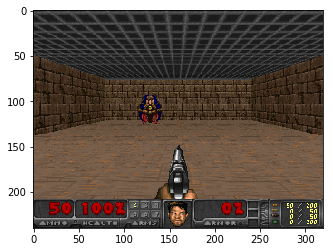

In [4]:
state = game.get_state()
    
screen_buffer = state.screen_buffer
screen_buffer = np.swapaxes(screen_buffer, 2, 0)
screen_buffer = np.swapaxes(screen_buffer, 0, 1)
plt.imshow(screen_buffer)  

# Show the depth-buffer.

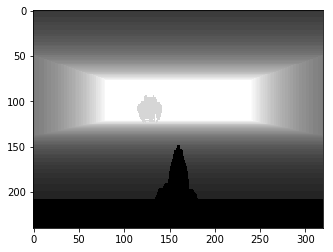

In [5]:
depth_buffer = state.depth_buffer
plt.imshow(depth_buffer, cmap="gray")

# Get the game variables.
https://github.com/mwydmuch/ViZDoom/blob/master/doc/Types.md#gamevariable

In [6]:
game_variables = state.game_variables
print(game_variables)

[50.]


# Perform a random action.

In [12]:
action = random.choice(actions)
print(action)
reward = game.make_action(action)
print(reward)

[1, 0, 0]
-1.0


# Close the game.

In [13]:
game.close()
print("Done.")

Done.


# Just run for a while with random actions.

In [18]:
# Creates the Doom-game.
config_path = config_paths[-1]
game = DoomGame()
game.load_config(config_paths[-1])
game.set_window_visible(True)
game.set_depth_buffer_enabled(True)
game.init()
game.set_window_visible(False)

 
sleep_time = 0.01
count = int(10 / sleep_time)
while not game.is_episode_finished() and count > 0:
    state = game.get_state()
    screen_buffer = state.screen_buffer
    misc = state.game_variables
    action = random.choice(actions)
    reward = game.make_action(action)
    time.sleep(sleep_time)
    count -= 1
   
game.close()